<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks_Level_2/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

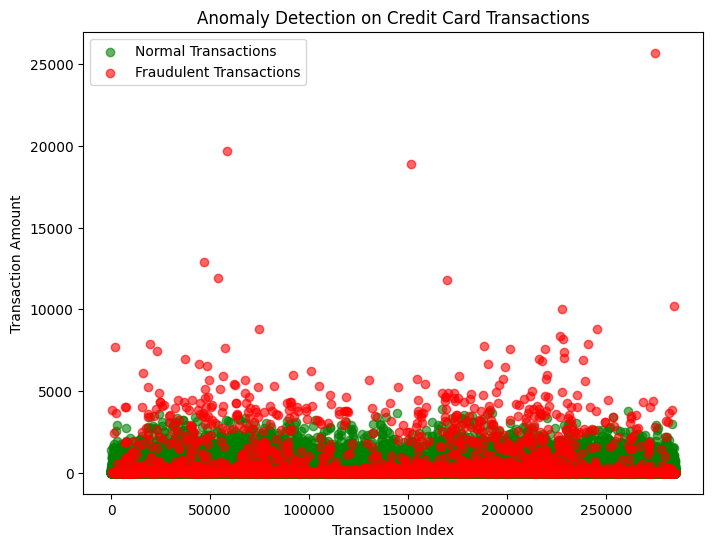

Number of outliers (fraudulent transactions) detected: 2849


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Credit Card Fraud Dataset
data = pd.read_csv("creditcard.csv")

# Step 2: Select Relevant Features and Preprocess
# Selecting only the numerical features
features = data.drop(columns=["Time", "Class"])  # 'Class' is the target variable
target = data["Class"]  # 0 for normal, 1 for fraud

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred = iso_forest.fit_predict(scaled_features)  # 1 for normal, -1 for anomalies

# Step 4: Map Predictions to Fraud Detection
data["Anomaly"] = (y_pred == -1).astype(int)  # 1 for anomaly, 0 for normal

# Step 5: Calculate Number of Outliers (Fraudulent Transactions)
num_outliers = len(data[data["Anomaly"] == 1])

# Step 6: Visualize Results
fraud_cases = data[data["Anomaly"] == 1]
normal_cases = data[data["Anomaly"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(normal_cases.index, normal_cases["Amount"], c="green", label="Normal Transactions", alpha=0.6)
plt.scatter(fraud_cases.index, fraud_cases["Amount"], c="red", label="Fraudulent Transactions", alpha=0.6)
plt.title("Anomaly Detection on Credit Card Transactions")
plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount")
plt.legend()
plt.show()

# Step 7: Print the Number of Outliers
print("Number of outliers (fraudulent transactions) detected:", num_outliers)